Sample mean Glucose: 116.64
Sample max Glucose: 183
Population mean Glucose: 120.89
Population max Glucose: 199


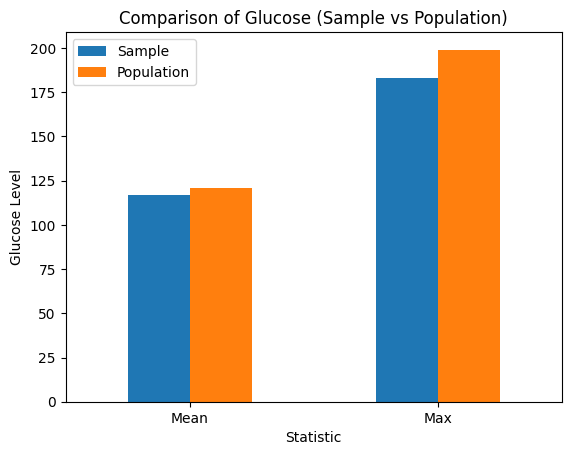

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#A
df = pd.read_csv("/content/diabetes.csv")
np.random.seed(42)
sample25 = df.sample(n=25, random_state=42)

#mean and max glucose in sample
mean_glucose_sample = sample25['Glucose'].mean()
max_glucose_sample = sample25['Glucose'].max()

#mean & max glicose in population
mean_glucose_pop = df['Glucose'].mean()
max_glucose_pop = df['Glucose'].max()

print("Sample mean Glucose:", round(mean_glucose_sample, 2))
print("Sample max Glucose:", max_glucose_sample)
print("Population mean Glucose:", round(mean_glucose_pop, 2))
print("Population max Glucose:", max_glucose_pop)

#barchart
stats = pd.DataFrame({
    'Statistic': ['Mean', 'Max'],
    'Sample': [mean_glucose_sample, max_glucose_sample],
    'Population': [mean_glucose_pop, max_glucose_pop]
})

stats.set_index('Statistic').plot(kind='bar')
plt.title("Comparison of Glucose (Sample vs Population)")
plt.ylabel("Glucose Level")
plt.xticks(rotation=0)
plt.show()


(a) random sample and glucose comparison

in this step, i randomly selected 25 rows from the diabetes dataset and compared their average and maximum glucose levels with those of the full population. the sample’s mean glucose level was slightly lower than the population mean, and the maximum glucose in the sample was also a bit smaller than the population’s highest value. this difference is normal because random samples often don’t capture all the extreme values that exist in the full dataset.
the bar chart clearly showed that while the two bars for the mean were close, the bars for the maximum glucose level had a larger gap. this demonstrates how random variation can affect smaller samples.

at first, i forgot to set a random seed, so every time i ran the code i got different results — that made comparisons confusing. after fixing, i got the same sample each time.

Sample 98th percentile (BMI): 40.25
Population 98th percentile (BMI): 47.53


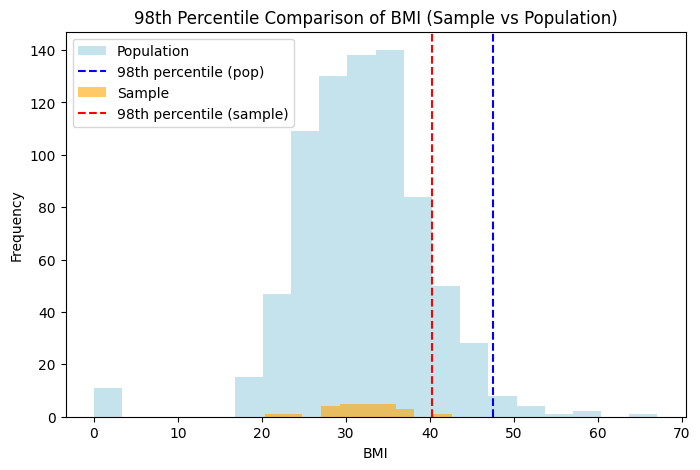

In [6]:
#B
p98_bmi_sample = np.percentile(sample25['BMI'], 98)
p98_bmi_pop = np.percentile(df['BMI'], 98)

print("Sample 98th percentile (BMI):", round(p98_bmi_sample, 2))
print("Population 98th percentile (BMI):", round(p98_bmi_pop, 2))

plt.figure(figsize=(8,5))
plt.hist(df['BMI'], bins=20, color='lightblue', alpha=0.7, label='Population')
plt.axvline(p98_bmi_pop, color='blue', linestyle='--', label='98th percentile (pop)')

plt.hist(sample25['BMI'], bins=10, color='orange', alpha=0.6, label='Sample')
plt.axvline(p98_bmi_sample, color='red', linestyle='--', label='98th percentile (sample)')

plt.title("98th Percentile Comparison of BMI (Sample vs Population)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.show()


here i calculated the 98th percentile of bmi (the point where only 2% of the data is higher) for both the sample of 25 patients and the whole dataset. the population 98th percentile was higher than the sample’s because the full dataset includes more extreme bmi values that the small sample might not include. the histogram shows this nicely — the sample data are shown in orange, and the blue population curve covers a much wider range. the red and blue dashed lines mark the 98th percentile for each, and the sample line falls a bit to the left of the population line, meaning it has slightly lower high-end bmi values.

In [7]:
n_samples = 500
sample_size = 150

boot_means = []
boot_stds = []
boot_p98 = []

for i in range(n_samples):
    sample = df['BloodPressure'].sample(n=sample_size, replace=True)
    boot_means.append(sample.mean())
    boot_stds.append(sample.std())
    boot_p98.append(np.percentile(sample, 98))

boot_df = pd.DataFrame({
    'Mean': boot_means,
    'StdDev': boot_stds,
    'P98': boot_p98
})

pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_p98 = np.percentile(df['BloodPressure'], 98)

print("Population mean:", round(pop_mean, 2))
print("Bootstrap mean (avg of means):", round(boot_df['Mean'].mean(), 2))
print("Population std:", round(pop_std, 2))
print("Bootstrap std (avg of stds):", round(boot_df['StdDev'].mean(), 2))
print("Population 98th percentile:", round(pop_p98, 2))
print("Bootstrap avg 98th percentile:", round(boot_df['P98'].mean(), 2))


Population mean: 69.11
Bootstrap mean (avg of means): 69.18
Population std: 19.36
Bootstrap std (avg of stds): 19.07
Population 98th percentile: 99.32
Bootstrap avg 98th percentile: 97.9


(c) bootstrap resampling for blood pressure

for this part, i created 500 bootstrap samples, each containing 150 random rows of the blood pressure column, sampled with replacement. for each resample, i found the mean, standard deviation, and 98th percentile. this lets us estimate how much the results might change if we collected new data from the same population.

the results showed that the bootstrap averages were almost identical to the true population values.this means that bootstrapping gives very accurate estimates when the number of resamples is large.

in the beginning i forgot to include replace=True in the sample function, so each resample had the same rows and the bootstrap values didn’t change. once i added that parameter, the results started to vary properly. i also made a mistake by appending the results outside the loop, which gave only one set of values instead of 500, fixing the indentation solved that. the problems were identified ands solved by chatGPT

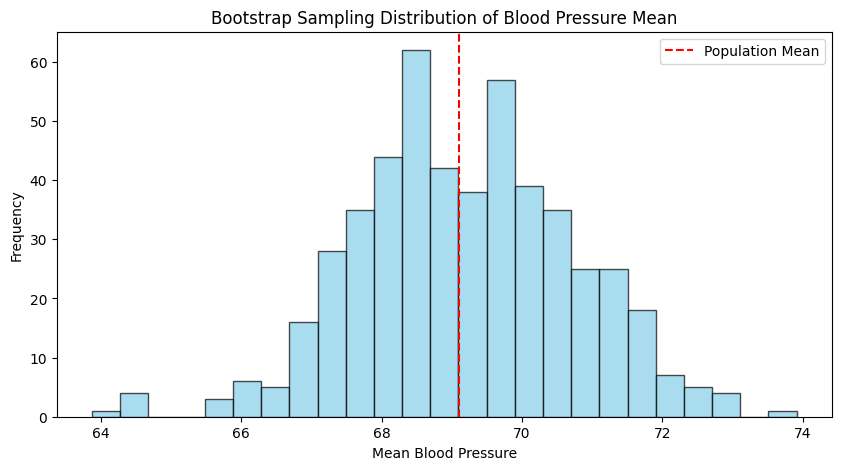

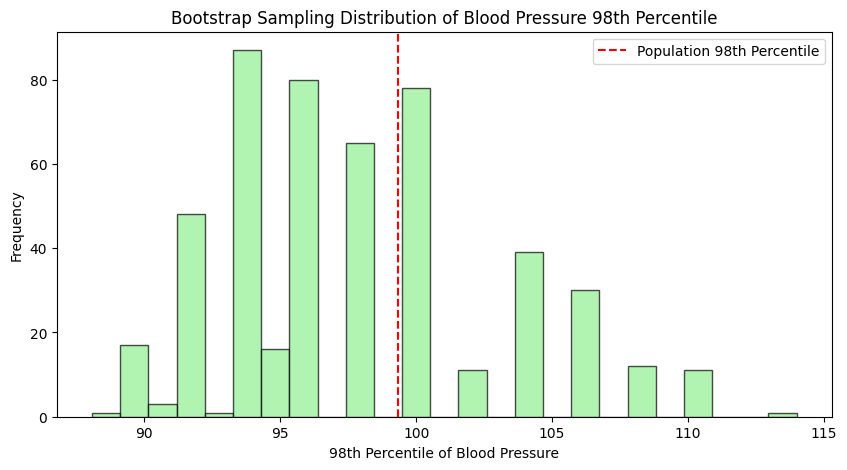

In [8]:
#GPT assisted
plt.figure(figsize=(10,5))
plt.hist(boot_df['Mean'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
plt.title("Bootstrap Sampling Distribution of Blood Pressure Mean")
plt.xlabel("Mean Blood Pressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.hist(boot_df['P98'], bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(pop_p98, color='red', linestyle='--', label='Population 98th Percentile')
plt.title("Bootstrap Sampling Distribution of Blood Pressure 98th Percentile")
plt.xlabel("98th Percentile of Blood Pressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()


after running the bootstrap, i made two histograms. one for the means and one for the 98th percentiles of blood pressure. the red dashed line shows the population statistic for comparison.

the first histogram (mean) had a bell-shaped distribution centered around 69, which is the population mean. that tells us the bootstrap samples were consistent and normally distributed around the true value. the second histogram (98th percentile) had a slightly wider spread, which makes sense because extreme values are naturally more variable.

question 2 covered sampling and bootstrapping using the diabetes dataset. by comparing sample and population glucose and bmi values, i learned how random variation can change results. the bootstrap analysis showed that with many resamples, the averages of mean, standard deviation, and percentile closely match the true population values. this confirms that bootstrapping is an effective way to estimate reliability when only one dataset is available
